In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '03d01771-e4df-4ba3-9900-568e495e43f8',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') 
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9743,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915121e+07,1.915121e+07,NaN,1,NaN,NaN,None,2022-09-15T10:28:00.000Z,20196.162587,4.041334e+10,-17.2870,0.321260,-0.821785,4.704603,-16.141831,-5.136836,-3.686798,3.867810e+11,39.0194,4.241194e+11,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253
1,1027,Ethereum,ETH,ethereum,6091,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,1.223759e+08,1.223759e+08,NaN,2,NaN,NaN,None,2022-09-15T10:28:00.000Z,1593.726803,2.539319e+10,8.5707,-0.460588,-0.404198,-2.356535,-15.856771,18.651682,45.444185,1.950338e+11,19.6736,1.950338e+11,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253
2,825,Tether,USDT,tether,39716,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.788344e+10,6.915678e+10,NaN,3,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000128,6.373887e+10,-8.3104,-0.001430,0.010980,0.006195,-0.006607,0.030220,0.126721,6.789210e+10,6.8464,6.916561e+10,None,2022-09-15T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-15 10:37:03.968253
3,3408,USD Coin,USDC,usd-coin,6197,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.074938e+10,5.074938e+10,NaN,4,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000047,7.243113e+09,-4.8556,0.009526,0.001664,0.004418,0.001889,0.017122,-0.030195,5.075175e+10,5.1195,5.075175e+10,None,2022-09-15T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-15 10:37:03.968253
4,1839,BNB,BNB,bnb,1103,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-15T10:28:00.000Z,276.356032,1.131969e+09,-2.1898,0.250348,-1.183882,-0.952082,-13.076248,10.339235,26.587610,4.458653e+10,4.4962,5.527121e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253
5,4687,Binance USD,BUSD,binance-usd,5089,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,6,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000740,1.063612e+10,-18.8060,0.022748,0.019021,0.100766,0.039817,0.250205,0.092866,2.053244e+10,2.0712,2.053244e+10,None,2022-09-15T10:28:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-15 10:37:03.968253
6,52,XRP,XRP,xrp,814,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-15T10:28:00.000Z,0.338411,1.364829e+09,-8.1266,-0.157260,0.649842,2.039740,-10.190240,-3.268078,3.205886,1.686165e+10,1.7010,3.384105e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253
7,2010,Cardano,ADA,cardano,569,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-15T10:28:00.000Z,0.476609,8.207698e+08,-17.0546,0.311778,0.819444,1.114481,-15.946350,5.544124,-2.730265,1.629148e+10,1.6434,2.144742e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253
8,5426,Solana,SOL,solana,383,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.538480e+08,5.116169e+08,NaN,9,NaN,NaN,None,2022

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '03d01771-e4df-4ba3-9900-568e495e43f8',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [56]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\dharm\AppData\Local\Temp\ipykernel_15852\987871451.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9743,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915121e+07,1.915121e+07,NaN,1,NaN,NaN,None,2022-09-15T10:28:00.000Z,20196.162587,4.041334e+10,-17.2870,0.321260,-0.821785,4.704603,-16.141831,-5.136836,-3.686798,3.867810e+11,39.0194,4.241194e+11,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253,NaT
1,1027,Ethereum,ETH,ethereum,6091,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,1.223759e+08,1.223759e+08,NaN,2,NaN,NaN,None,2022-09-15T10:28:00.000Z,1593.726803,2.539319e+10,8.5707,-0.460588,-0.404198,-2.356535,-15.856771,18.651682,45.444185,1.950338e+11,19.6736,1.950338e+11,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253,NaT
2,825,Tether,USDT,tether,39716,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.788344e+10,6.915678e+10,NaN,3,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000128,6.373887e+10,-8.3104,-0.001430,0.010980,0.006195,-0.006607,0.030220,0.126721,6.789210e+10,6.8464,6.916561e+10,None,2022-09-15T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-15 10:37:03.968253,NaT
3,3408,USD Coin,USDC,usd-coin,6197,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.074938e+10,5.074938e+10,NaN,4,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000047,7.243113e+09,-4.8556,0.009526,0.001664,0.004418,0.001889,0.017122,-0.030195,5.075175e+10,5.1195,5.075175e+10,None,2022-09-15T10:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-15 10:37:03.968253,NaT
4,1839,BNB,BNB,bnb,1103,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-15T10:28:00.000Z,276.356032,1.131969e+09,-2.1898,0.250348,-1.183882,-0.952082,-13.076248,10.339235,26.587610,4.458653e+10,4.4962,5.527121e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253,NaT
5,4687,Binance USD,BUSD,binance-usd,5089,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,6,NaN,NaN,None,2022-09-15T10:28:00.000Z,1.000740,1.063612e+10,-18.8060,0.022748,0.019021,0.100766,0.039817,0.250205,0.092866,2.053244e+10,2.0712,2.053244e+10,None,2022-09-15T10:28:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-15 10:37:03.968253,NaT
6,52,XRP,XRP,xrp,814,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-15T10:28:00.000Z,0.338411,1.364829e+09,-8.1266,-0.157260,0.649842,2.039740,-10.190240,-3.268078,3.205886,1.686165e+10,1.7010,3.384105e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253,NaT
7,2010,Cardano,ADA,cardano,569,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-15T10:28:00.000Z,0.476609,8.207698e+08,-17.0546,0.311778,0.819444,1.114481,-15.946350,5.544124,-2.730265,1.629148e+10,1.6434,2.144742e+10,None,2022-09-15T10:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-15 10:37:03.968253,NaT
8,5426,Solana,SOL,solana,383,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.53848

In [15]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.028463,-1.079254,4.369959,-16.218037,-5.551073,-3.866747
Ethereum,-0.516373,-0.815473,-2.846477,-16.133197,17.469575,44.863635
Tether,0.000615,0.009056,0.007960,-0.006168,0.033154,0.123481
USD Coin,0.001790,-0.003136,0.001852,0.000923,0.009442,-0.066611
BNB,-0.244625,-1.636649,-1.462981,-13.257696,9.447633,26.120614
Binance USD,-0.025784,0.033422,0.030226,0.012621,0.124408,-0.018427
XRP,-0.507104,0.237085,1.513061,-10.409981,-4.055591,2.750761
Cardano,0.042347,0.304028,0.622195,-16.000972,4.888973,-3.305396
Solana,-0.140307,0.795652,2.388006,-22.891891,-14.421655,7.375050


In [16]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      -0.028463
             quote.USD.percent_change_24h     -1.079254
             quote.USD.percent_change_7d       4.369959
             quote.USD.percent_change_30d    -16.218037
             quote.USD.percent_change_60d     -5.551073
             quote.USD.percent_change_90d     -3.866747
Ethereum     quote.USD.percent_change_1h      -0.516373
             quote.USD.percent_change_24h     -0.815473
             quote.USD.percent_change_7d      -2.846477
             quote.USD.percent_change_30d    -16.133197
             quote.USD.percent_change_60d     17.469575
             quote.USD.percent_change_90d     44.863635
Tether       quote.USD.percent_change_1h       0.000615
             quote.USD.percent_change_24h      0.009056
             quote.USD.percent_change_7d       0.007960
             quote.USD.percent_change_30d     -0.006168
             quote.USD.percent_change_60d      0.033154
      

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin     quote.USD.percent_change_1h    -0.028463
            quote.USD.percent_change_24h   -1.079254
            quote.USD.percent_change_7d     4.369959
            quote.USD.percent_change_30d  -16.218037
            quote.USD.percent_change_60d   -5.551073
            quote.USD.percent_change_90d   -3.866747
Ethereum    quote.USD.percent_change_1h    -0.516373
            quote.USD.percent_change_24h   -0.815473
            quote.USD.percent_change_7d    -2.846477
            quote.USD.percent_change_30d  -16.133197
            quote.USD.percent_change_60d   17.469575
            quote.USD.percent_change_90d   44.863635
Tether      quote.USD.percent_change_1h     0.000615
            quote.USD.percent_change_24h    0.009056
            quote.USD.percent_change_7d     0.007960
            quote.USD.percent_change_30d   -0.006168
            quote.USD.percent_change_60d    0.033154
            quote.USD.percent_change_90d    0.123481
USD Coin    quote.USD.percent_change_1h     0.001790
            quote.USD.percent_change_24h   -0.003136
            quote.USD.percent_change_7d     0.001852
            quote.USD.percent_change_30d    0.000923
            quote.USD.percent_change_60d    0.009442
            quote.USD.percent_change_90d   -0.066611
BNB         quote.USD.percent_change_1h    -0.244625
            quote.USD.percent_change_24h   -1.636649
            quote.USD.percent_change_7d    -1.462981
            quote.USD.percent_change_30d  -13.257696
            quote.USD.percent_change_60d    9.447633
            quote.USD.percent_change_90d   26.120614
Binance USD quote.USD.percent_change_1h    -0.025784
            quote.USD.percent_change_24h    0.033422
            quote.USD.percent_change_7d     0.030226
            quote.USD.percent_change_30d    0.012621
            quote.USD.percent_change_60d    0.124408
            quote.USD.percent_change_90d   -0.018427
XRP         quote.USD.percent_change_1h    -0.507104
            quote.USD.percent_change_24h    0.237085
            quote.USD.percent_change_7d     1.513061
            quote.USD.percent_change_30d  -10.409981
            quote.USD.percent_change_60d   -4.055591
            quote.USD.percent_change_90d    2.750761
Cardano     quote.USD.percent_change_1h     0.042347
            quote.USD.percent_change_24h    0.304028
            quote.USD.percent_change_7d     0.622195
            quote.USD.percent_change_30d  -16.000972
            quote.USD.percent_change_60d    4.888973
            quote.USD.percent_change_90d   -3.305396
Solana      quote.USD.percent_change_1h    -0.140307
            quote.USD.percent_change_24h    0.795652
            quote.USD.percent_change_7d     2.388006
            quote.USD.percent_change_30d  -22.891891
            quote.USD.percent_change_60d  -14.421655
            quote.USD.percent_change_90d    7.375050
Dogecoin    quote.USD.percent_change_1h    -0.256787
            quote.USD.percent_change_24h   -0.439650
            quote.USD.percent_change_7d    -0.513521
            quote.USD.percent_change_30d  -30.368543
            quote.USD.percent_change_60d   -5.996790
            quote.USD.percent_change_90d    5.519944
Polkadot    quote.USD.percent_change_1h    -0.315618
            quote.USD.percent_change_24h   -1.368984
            quote.USD.percent_change_7d    -1.435080
            quote.USD.percent_change_30d  -19.810191
            quote.USD.percent_change_60d   -0.375881
            quote.USD.percent_change_90d   -2.848042
Polygon     quote.USD.percent_change_1h    -0.327629
            quote.USD.percent_change_24h    0.053538
            quote.USD.percent_change_7d     2.937882
            quote.USD.percent_change_30d  -10.509994
            quote.USD.percent_change_60d   12.827080
            quote.USD.percent_change_90d  113.470370
Dai         quote.USD.percent_change_1h    -0.017318
            quote.USD.percent_change_24h   -0.001593
            quote.

In [31]:
df5.count()

values    90
dtype: int64

In [34]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.028463
1,Bitcoin,quote.USD.percent_change_24h,-1.079254
2,Bitcoin,quote.USD.percent_change_7d,4.369959
3,Bitcoin,quote.USD.percent_change_30d,-16.218037
4,Bitcoin,quote.USD.percent_change_60d,-5.551073
5,Bitcoin,quote.USD.percent_change_90d,-3.866747
6,Ethereum,quote.USD.percent_change_1h,-0.516373
7,Ethereum,quote.USD.percent_change_24h,-0.815473
8,Ethereum,quote.USD.percent_change_7d,-2.846477
9,Ethereum,quote.USD.percent_change_30d,-16.133197


In [35]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.028463
1,Bitcoin,quote.USD.percent_change_24h,-1.079254
2,Bitcoin,quote.USD.percent_change_7d,4.369959
3,Bitcoin,quote.USD.percent_change_30d,-16.218037
4,Bitcoin,quote.USD.percent_change_60d,-5.551073
5,Bitcoin,quote.USD.percent_change_90d,-3.866747
6,Ethereum,quote.USD.percent_change_1h,-0.516373
7,Ethereum,quote.USD.percent_change_24h,-0.815473
8,Ethereum,quote.USD.percent_change_7d,-2.846477
9,Ethereum,quote.USD.percent_change_30d,-16.133197


In [40]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.028463
1,Bitcoin,24h,-1.079254
2,Bitcoin,7d,4.369959
3,Bitcoin,30d,-16.218037
4,Bitcoin,60d,-5.551073
5,Bitcoin,90d,-3.866747
6,Ethereum,quote.USD.percent_change_1h,-0.516373
7,Ethereum,24h,-0.815473
8,Ethereum,7d,-2.846477
9,Ethereum,30d,-16.133197


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

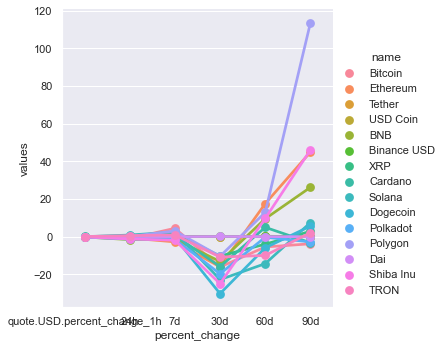

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [58]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,20196.162587,2022-09-15 10:37:03.968253
0,Bitcoin,20135.339742,NaT
0,Bitcoin,20136.063451,NaT
0,Bitcoin,20131.731871,NaT
0,Bitcoin,20140.928698,NaT
0,Bitcoin,20140.052566,NaT
0,Bitcoin,20190.628677,NaT
0,Bitcoin,20189.229475,NaT
0,Bitcoin,20184.404760,NaT
0,Bitcoin,20182.913657,NaT


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

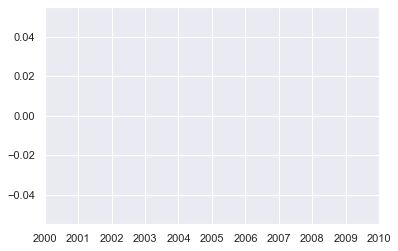

In [51]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)